## Lab Assignment

####Modify the CNN model in lab work 2 to achieve a testing accuracy of more than 80%.

Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


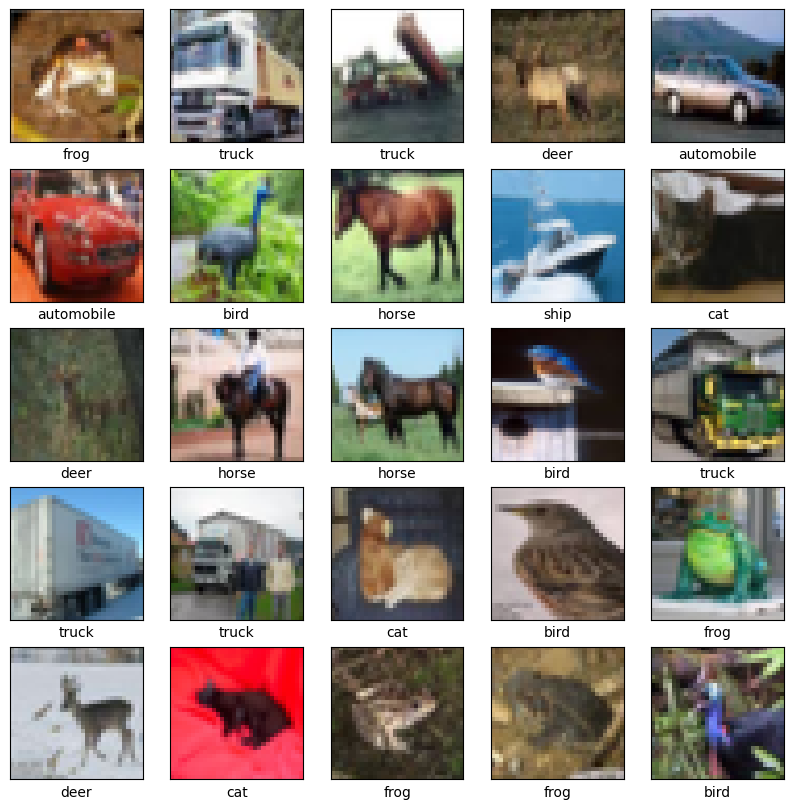

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
from tensorflow.keras import models, layers

model = models.Sequential()

# Layer Konvolusi Pertama
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Layer Konvolusi Kedua
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Layer Konvolusi Ketiga
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening
model.add(layers.Flatten())

# Layer Dense Pertama
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Layer Output
model.add(layers.Dense(10))

In [5]:
# Compile Model dengan Learning Rate yang Lebih Rendah
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 27s 8ms/step - loss: 7.8652 - accuracy: 0.3344 - val_loss: 5.9864 - val_accuracy: 0.4861
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 5.2557 - accuracy: 0.4516 - val_loss: 4.0896 - val_accuracy: 0.5362
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 3.5936 - accuracy: 0.5115 - val_loss: 2.8750 - val_accuracy: 0.5706
Epoch 4/50
1563/1563 [==============================] - 13s 9ms/step - loss: 2.5663 - accuracy: 0.5623 - val_loss: 2.2380 - val_accuracy: 0.5758
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9530 - accuracy: 0.6025 - val_loss: 1.8223 - val_accuracy: 0.5954
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5766 - accuracy: 0.6354 - val_loss: 1.5334 - val_accuracy: 0.6304
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3516 - accuracy: 0.6608 - val_loss: 1.3294 - val_ac

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 128)       5

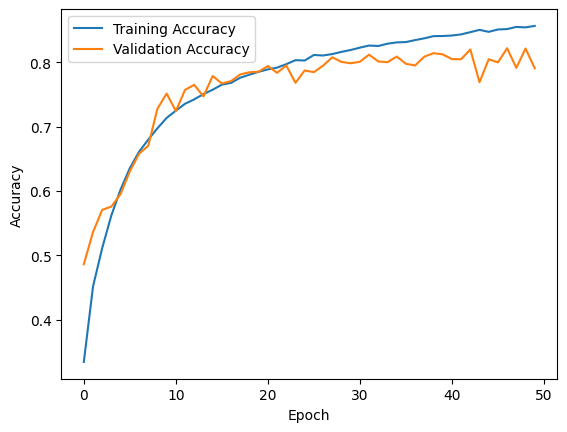

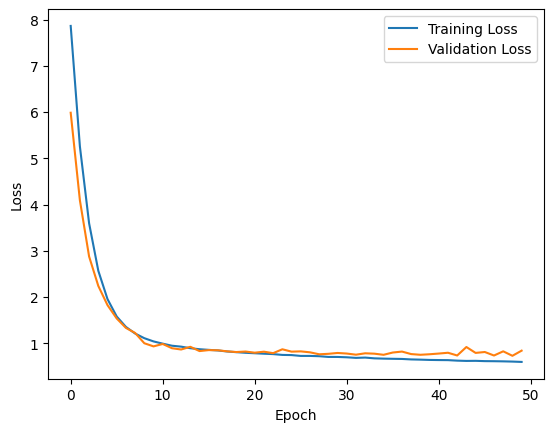

In [8]:
import matplotlib.pyplot as plt

# Membuat plot untuk akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Membuat plot untuk loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Cetak hasil akurasi
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


313/313 - 1s - loss: 0.8373 - accuracy: 0.7907 - 1s/epoch - 3ms/step
Test Accuracy: 0.7907000184059143
Test Loss: 0.8373211622238159


### Conclusion

There is a difference in accuracy results in practicum 2 and assignment 1. In practicum 2, the accuracy was **70.64%**, while in assignment 1 the accuracy was **82.02%**. This can happen because:
1. There is a change in architecture where task 1 adopts a more complex architecture using **batch normalization, dropout, and L2 regularization**. This gives the model more capacity to capture features by preventing overfitting. In contrast, practicum 1 only uses a simple architecture, namely using **three convolution layers, two max polling layers, and two dense layers**
2. Then in task 1 we also trained for 50 epochs, in contrast to practicum 2 which only had 10 epochs.

It can be concluded that the addition of techniques such as batch normalization and dropout with architectural adjustments has improved model performance on test data

#### Create a CNN model for classifying the MNIST dataset

In [10]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras import layers
from keras import backend as k
from tensorflow.keras import layers, models

Loada Dataset

In [11]:
# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Data Normalization

In [12]:
# Normalisasi pixel values ke rentang [0, 1]
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Making CNN Model

In [13]:
# Membangun model CNN
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=inpx, activation='elu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='elu'))
model.add(layers.MaxPooling2D(pool_size=(3,3)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1048832   
                                                      

Model Compilation

In [14]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1442 - accuracy: 0.9568 - val_loss: 0.0520 - val_accuracy: 0.9837
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0336 - val_accuracy: 0.9882
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0363 - val_accuracy: 0.9881
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0313 - val_accuracy: 0.9894
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0318 - val_accuracy: 0.9889
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0296 - val_accuracy

Model Evaluation

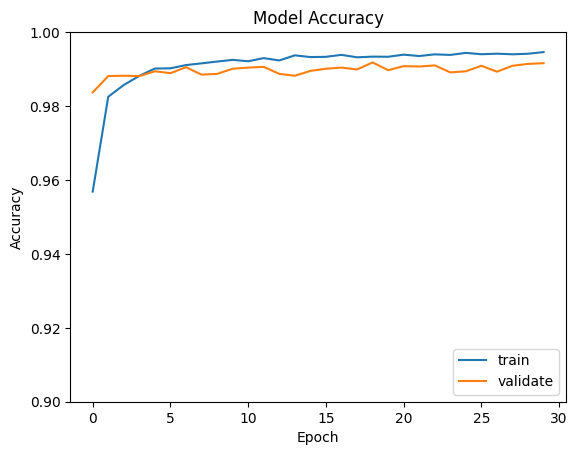

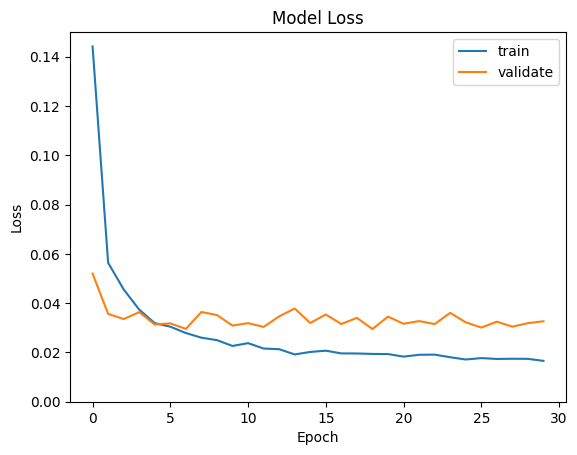

In [16]:
# Model Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

# Model Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.15])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()

In [17]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Cetak hasil akurasi
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

313/313 - 1s - loss: 0.0326 - accuracy: 0.9916 - 706ms/epoch - 2ms/step
Test Accuracy: 0.991599977016449
Test Loss: 0.03264858201146126


##### Conclusion

Based on the output produced, test accuracy results were 99.11% and test loss was 0.0298. This shows that the model has a very high level of accuracy and low loss, indicating that this model has a good ability to recognize and classify digits from the MNIST dataset.